<a href="https://colab.research.google.com/github/il1yasvie1/FEM-Isometry/blob/main/isometric-bending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook shows some examples. We use [FEM on Colab](https://fem-on-colab.github.io/) that allows to easily install `firedrake` for test.

In [1]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [2]:
!pip install git+https://github.com/il1yasvie1/FEM-Isometry.git

  Cloning https://github.com/il1yasvie1/FEM-Isometry.git to /tmp/pip-req-build-67m9idwf
  Running command git clone --filter=blob:none --quiet https://github.com/il1yasvie1/FEM-Isometry.git /tmp/pip-req-build-67m9idwf
  Resolved https://github.com/il1yasvie1/FEM-Isometry.git to commit 998c0e4d34b5d911f2d0584a9ee7c511bf9007d4
  Preparing metadata (setup.py) ... done


In [3]:
from isometric_bending_solver.problem import IsometricBendingProblem
from isometric_bending_solver.utils import plot_deformation, compute_isometry_defect, compute_surface_area, manufactured_solution
from firedrake import *
import numpy as np

q_degree = 2
dx = dx(metadata={'quadrature_degree': q_degree})
dS = dS(metadata={'quadrature_degree': q_degree})
ds = ds(metadata={'quadrature_degree': q_degree})

# Test on Manufactured Solution

In [4]:
nx = 16
family, degree, nitsche = ('CG', 2, False)
stabilized = False
mesh = UnitSquareMesh(nx, nx)
x = SpatialCoordinate(mesh)
theta = np.pi / 4

y_exact = as_vector([sin(theta * x[0]) / theta,
                     x[1],
                     1 - cos(theta * x[0]) / theta])

config = {'mesh': mesh,
          'function_space': {'family': family,
                             'degree': degree},
          'continuation': False,
          'nitsche': nitsche,
          'stabilized': stabilized,
          'f': as_vector([(theta**3) * sin(theta * x[0]),
                          0,
                          (-1) * (theta**3) * cos(theta * x[0])]),
          'g': as_vector([sin(theta * x[0]) / theta,
                          x[1],
                          1 - cos(theta * x[0]) / theta]),
          'phi': as_matrix([[cos(theta * x[0]), 0],
                            [0, 1],
                            [sin(theta * x[0]), 0]]),
          'sub_domain': (1, 2, 3, 4),
          'solver_parameters': {
              # 'snes_rtol': 1e-9, 'snes_atol': 1e-50,
              # 'pc_type': 'lu',
              # 'pc_factor_mat_solver_type': 'mumps',
              # 'snes_type': 'newtonls',
              # 'ksp_type': 'preonly',
          }}

In [5]:
problem = IsometricBendingProblem(config)

In [6]:
z = problem.solve()

██╗███████╗ ██████╗ ███╗   ███╗███████╗████████╗██████╗ ██╗ ██████╗
██║██╔════╝██╔═══██╗████╗ ████║██╔════╝╚══██╔══╝██╔══██╗██║██╔════╝
██║███████╗██║   ██║██╔████╔██║█████╗     ██║   ██████╔╝██║██║ 
██║╚════██║██║   ██║██║╚██╔╝██║██╔══╝     ██║   ██╔══██╗██║██║ 
██║███████║╚██████╔╝██║ ╚═╝ ██║███████╗   ██║   ██║  ██║██║╚██████╗
╚═╝╚══════╝ ╚═════╝ ╚═╝     ╚═╝╚══════╝   ╚═╝   ╚═╝  ╚═╝╚═╝ ╚═════╝
Family:                        CG_2
MeshSize:                      0.088388
Continuation:                  False
Nitsches Approach:             False
stabilized:                    False
Solver converged


In [7]:
y, w, p = z.subfunctions

In [8]:
print(f'Isometric defect: {compute_isometry_defect(y)}',
      f'Surface area: {compute_surface_area(y)}',
      f'L^2 error: {norm(y - y_exact)}')

Isometric defect: 0.0005597180613422978 Surface area: 0.999982341859864 L^2 error: 7.180712642844982e-05


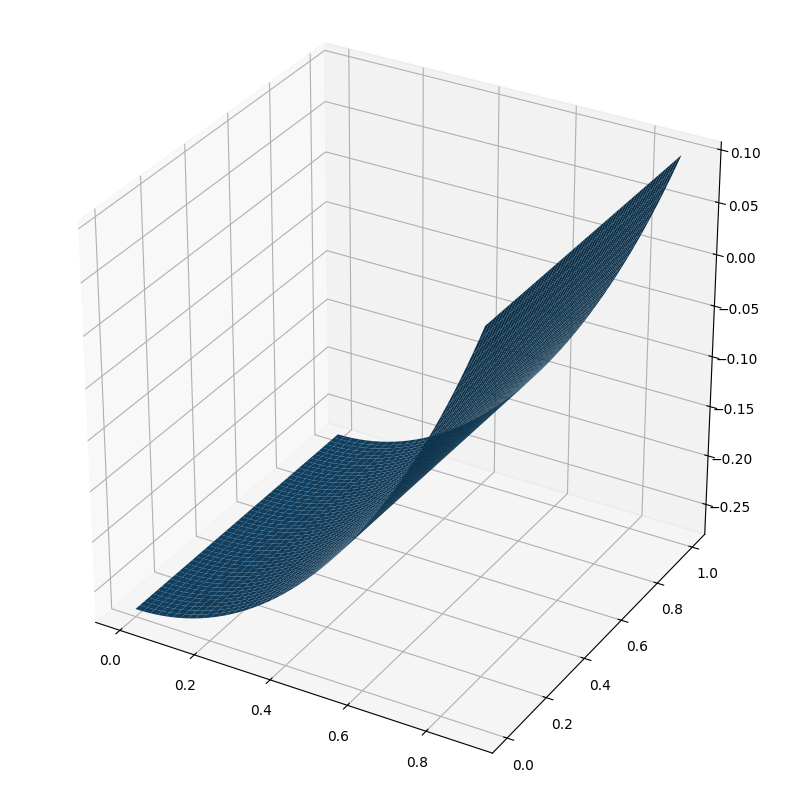

In [9]:
x0 = np.linspace(0, 1)
x1 = np.linspace(0, 1)
plot_deformation(x0, x1, y)